### Plotting results


In [1]:
import matplotlib.pyplot as plt
from keras.callbacks import History
import pandas as pd
import numpy as np


2023-04-20 01:40:11.604516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_history(history: pd.DataFrame):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 3))
    keys = ["root_mean_squared_error", "mean_absolute_error"]

    # training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in keys:
        ax11.plot(history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()

    # validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in keys:
        ax22.plot(history['val_' + metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")

    plt.show()


In [3]:
def plot_result(result: pd.DataFrame):
    y_test = result["real"]
    y_pred = result["predict"]
    plt.scatter(y_pred, y_test, s=1)

    # This will fit the best line into the graph
    plt.xlabel("Predict rating")
    plt.ylabel("Real rating")

    plt.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 2))(np.unique(y_pred)), color='red')


### Loss vs Epochs


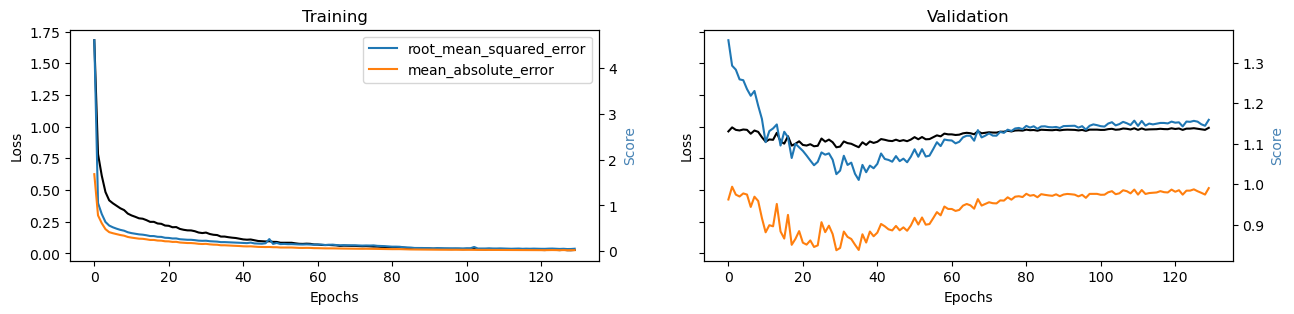

In [4]:
history = pd.read_csv("./history_.csv")
plot_history(history)


### Real rating vs Predicted rating


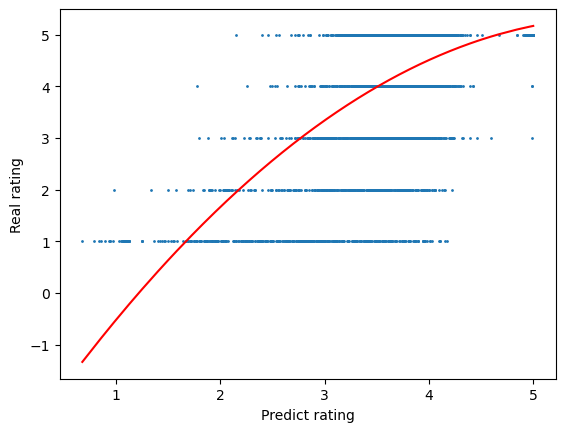

In [5]:
result = pd.read_csv("./result_.csv")
plot_result(result)


### Full predicted dataset


In [6]:
result_full = pd.read_csv("./result_full_.csv")
result_full


,asin,reviewerID,overall,image,text,predict
0,2661,16448,5.0,"[-0.33588200312742045, -0.7888306642209753, -0...",[0. 0. 0. ... 0. 0. 0.],3.605667
1,49,13621,5.0,"[-0.32006513788671487, -0.7717771611940896, -0...",[0. 0. 0. ... 0. 0. 0.],4.995186
2,94,16196,3.0,"[0.1581576236340486, -0.6485071697713213, 0.01...",[0. 0. 0. ... 0. 0. 0.],3.638035
3,2941,6150,2.0,"[0.9193118889779242, -0.8573557270591129, 0.84...",[0. 0. 0. ... 0. 0. 0.],2.070844
4,2052,2611,5.0,"[2.636161955224655, 1.6946959390038683, -0.684...",[0. 0. 0. ... 0. 0. 0.],3.385855
...,...,...,...,...,...,...
4876,30,11952,5.0,"[0.017278018121817753, -0.7135505185353989, -0...",[0. 0. 0. ... 0. 0. 0.],3.624927
4877,171,2832,4.0,"[-0.6286848484430441, -0.2461307708979443, -0....",[0. 0. 0. ... 0. 0. 0.],3.673154
4878,2052,3099,4.0,"[2.636161955224655, 1.6946959390038683, -0.684...",[0. 0. 0. ... 0. 0. 0.],3.554991
4879,42,17476,5.0,"[0.09256375215607522, -0.07137308023922362, -0...",[0.00989336 0. 0. ... 0. ...,3.520454
